In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import pingouin as pg
import scipy
from scipy.stats import chi2
from scipy.stats import chi2_contingency
from scipy.stats import pearsonr, spearmanr
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn import tree
from sklearn.tree import export_graphviz
from sklearn.linear_model import Perceptron
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import roc_curve,  precision_recall_curve, roc_auc_score, confusion_matrix, accuracy_score, recall_score, precision_score, f1_score,auc, roc_curve, plot_confusion_matrix
from category_encoders import BinaryEncoder
from IPython.display import Image
import pydotplus
import matplotlib.pyplot as plt
%matplotlib inline
color = sns.color_palette()
seed = 42
import dataframe_image as dfi

In [9]:
data = pd.read_csv('german_credit_data.csv', low_memory=False)

In [10]:
dfi.export(data.head(), 'veriseti2_head.png')

In [11]:
data.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,2,49,male,1,own,little,NaN,2096,12,education,good
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,4,53,male,2,free,little,little,4870,24,car,bad


In [12]:
data.rename(columns = {'Saving accounts':'Saving_accounts','Checking account':'Checking_account','Credit amount':'Credit_amount'}, inplace = True)

In [13]:
data.describe().round(3)

,Unnamed: 0,Age,Job,Credit_amount,Duration
count,1000.000,1000.000,1000.000,1000.000,1000.000
mean,499.500,35.546,1.904,3271.258,20.903
std,288.819,11.375,0.654,2822.737,12.059
min,0.000,19.000,0.000,250.000,4.000
25%,249.750,27.000,2.000,1365.500,12.000
50%,499.500,33.000,2.000,2319.500,18.000
75%,749.250,42.000,2.000,3972.250,24.000
max,999.000,75.000,3.000,18424.000,72.000


In [14]:
data.describe(include=[np.object])

<ipython-input-14-c07674af406a>:1: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  data.describe(include=[np.object])


,Sex,Housing,Saving_accounts,Checking_account,Purpose,Risk
count,1000,1000,817,606,1000,1000
unique,2,3,4,3,8,2
top,male,own,little,little,car,good
freq,690,713,603,274,337,700


In [15]:
Risk = data.Risk.value_counts().to_frame().rename(columns={"Risk":"absolute" })

Risk["percent"] = Risk.apply(lambda x: x/x.sum()*100).round(2)

Risk

,absolute,percent
good,700,70.0
bad,300,30.0


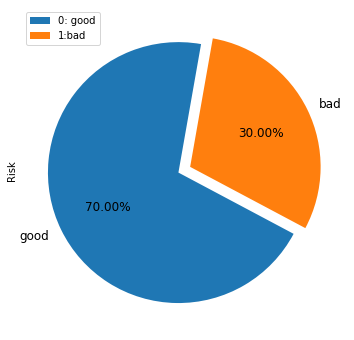

In [16]:
#pie chart
data.Risk.value_counts().plot(kind = 'pie', subplots=True,
                                 autopct='%1.2f%%', explode = (0.05, 0.05),
                                  startangle=80, legend =True,
                                  fontsize=12, figsize=(14,6), textprops={'color':"black"})
plt.legend(["0: good","1:bad"]);

In [17]:
data.dtypes.sort_values(ascending=True)

Unnamed: 0           int64
Age                  int64
Job                  int64
Credit_amount        int64
Duration             int64
Sex                 object
Housing             object
Saving_accounts     object
Checking_account    object
Purpose             object
Risk                object
dtype: object

In [18]:
data.dtypes.value_counts()

object    6
int64     5
dtype: int64

In [19]:
nulval = data.isnull().sum().to_frame().rename(columns ={ 0: "absolute"})

nulval["percent"] = (nulval.apply(lambda x: x/x.sum())*100).round(2)

nulval

,absolute,percent
Unnamed: 0,0,0.00
Age,0,0.00
Sex,0,0.00
Job,0,0.00
Housing,0,0.00
Saving_accounts,183,31.72
Checking_account,394,68.28
Credit_amount,0,0.00
Duration,0,0.00
Purpose,0,0.00


### 'Saving Accounts' and 'Checking Account' have missing value

In [20]:
# Histogram
def hist(x):
    plt.hist(data[x], bins=25)
    plt.title(x, fontsize=10, loc="right")
    plt.xlabel('Relative frequency')
    plt.ylabel('Absolute frequency')
    plt.show()

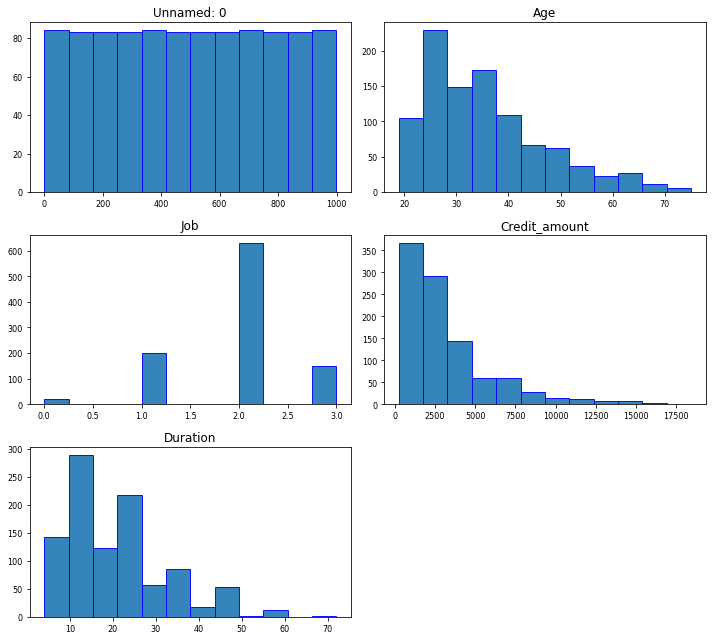

In [21]:
data.hist(figsize=(10,9), bins=12, ec="b", xlabelsize=8, ylabelsize=8, alpha=0.9, grid=False)

plt.tight_layout()
plt.show()

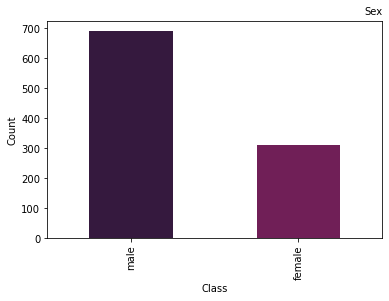

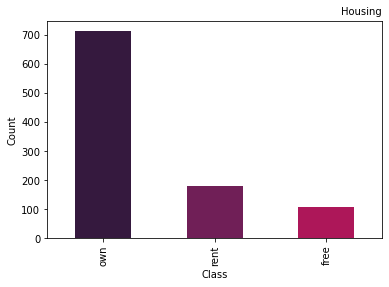

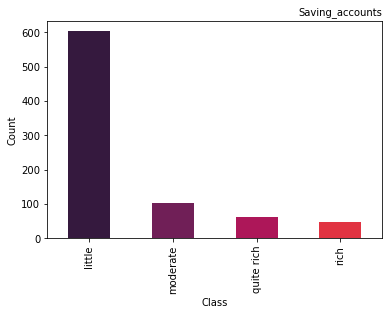

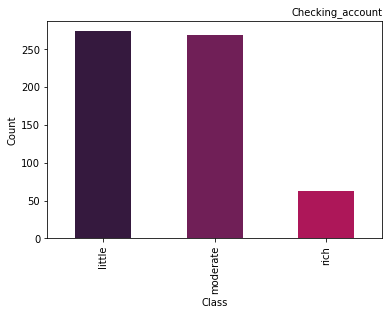

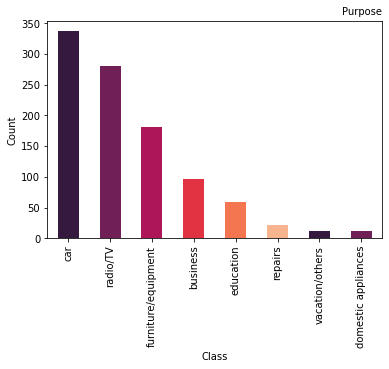

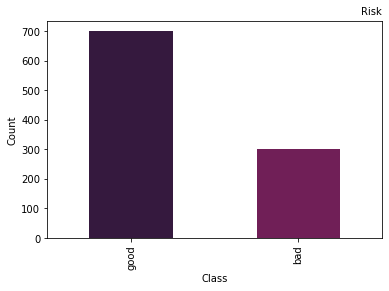

In [22]:
for col in data.select_dtypes(include=["object"]).columns:
    data[col].value_counts().plot(kind="bar", color=sns.color_palette("rocket"))

    plt.xlabel("Class", fontsize=10)
    plt.xticks(rotation = 90, horizontalalignment ="center")
    plt.ylabel("Count", fontsize =10)
    plt.title(col, fontsize=10, loc = "right")
    plt.show()

In [23]:
def target(x):
    short_0 = data[data.Risk == "good"].loc[:,x]
    short_1 = data[data.Risk == "bad"].loc[:,x]
    
    a = np.array(short_0)
    b = np.array(short_1)
    
    np.warnings.filterwarnings('ignore')
    
    plt.hist(a, bins=40, density=True, color="g", alpha = 0.6, label='good', align="left")
    plt.hist(b, bins=40, density=True, color="r", alpha = 0.6, label='bad', align="right")
    plt.legend(loc='upper right')
    plt.title(x, fontsize=10, loc="right")
    plt.xlabel('Absolute frequency')
    plt.ylabel('Relative frequency')
    plt.show()

# Age

C:\Users\berk.dergi\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


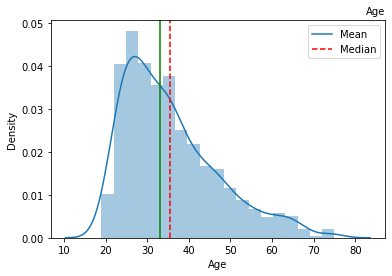

'Median: 33.0'

'Mean: 35.546'

In [24]:
variable = data["Age"]

mean =np.array(variable).mean()
median = np.median(variable)

ax= sns.distplot(variable)
ax.axvline(mean,color='r', linestyle = '--')
ax.axvline(median,color='g', linestyle = '-')

plt.title("Age", fontsize=10, loc="right")
plt.legend({'Mean': mean, 'Median': median})
plt.show()

display("Median: " + str(median))
display("Mean: " + str(mean))

# Sex

array([<AxesSubplot:ylabel='Sex'>], dtype=object)

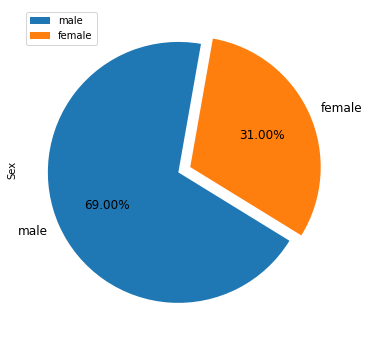

In [25]:
data.Sex.value_counts().plot(kind = 'pie', subplots=True,
                                 autopct='%1.2f%%', explode = (0.05, 0.05),
                                  startangle=80, legend =True,
                                  fontsize=12, figsize=(14,6), textprops={'color':"black"})


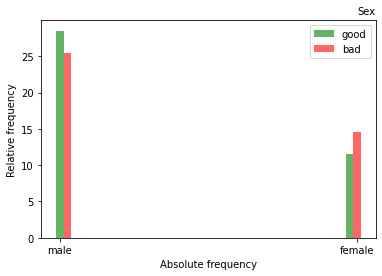

In [26]:
target("Sex")

# Job

array([<AxesSubplot:ylabel='Job'>], dtype=object)

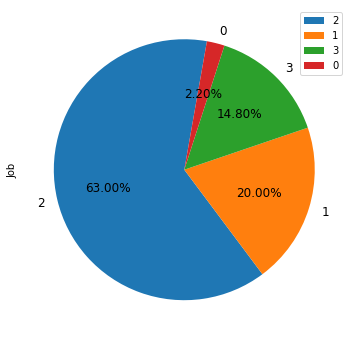

In [27]:
data.Job.value_counts().plot(kind = 'pie', subplots=True,
                                 autopct='%1.2f%%',
                                  startangle=80, legend =True,
                                  fontsize=12, figsize=(14,6), textprops={'color':"black"})

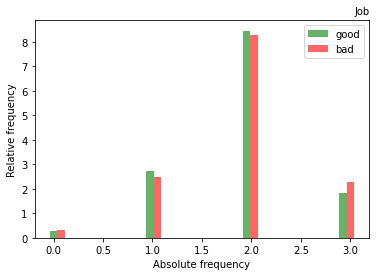

In [28]:
target("Job")

# Housing

array([<AxesSubplot:ylabel='Housing'>], dtype=object)

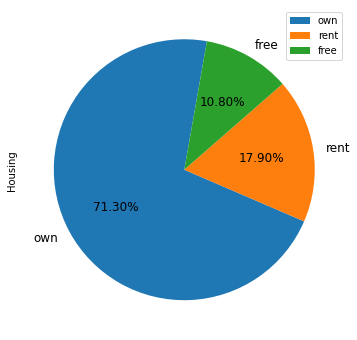

In [29]:
data.Housing.value_counts().plot(kind = 'pie', subplots=True,
                                 autopct='%1.2f%%',
                                  startangle=80, legend =True,
                                  fontsize=12, figsize=(14,6), textprops={'color':"black"})

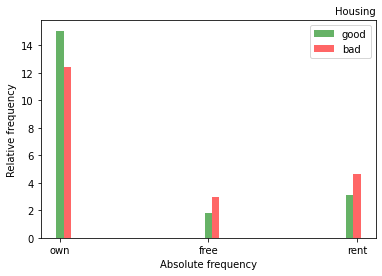

In [30]:
target("Housing")

# Saving accounts

array([<AxesSubplot:ylabel='Saving_accounts'>], dtype=object)

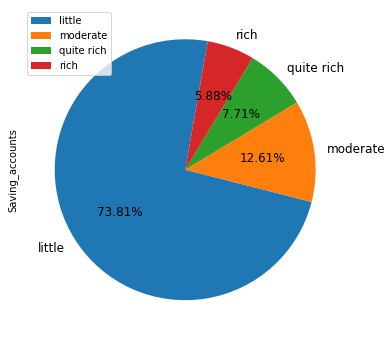

In [31]:
data.Saving_accounts.value_counts().plot(kind = 'pie', subplots=True,
                                 autopct='%1.2f%%',
                                  startangle=80, legend =True,
                                  fontsize=12, figsize=(14,6), textprops={'color':"black"})


# Checking_account

array([<AxesSubplot:ylabel='Checking_account'>], dtype=object)

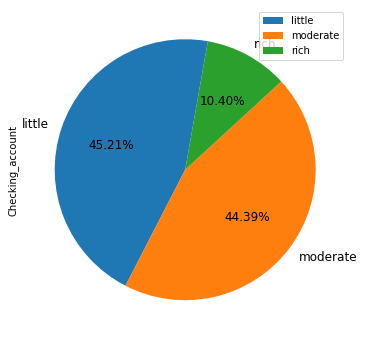

In [32]:
data.Checking_account.value_counts().plot(kind = 'pie', subplots=True,
                                 autopct='%1.2f%%',
                                  startangle=80, legend =True,
                                  fontsize=12, figsize=(14,6), textprops={'color':"black"})



# Credit Amount

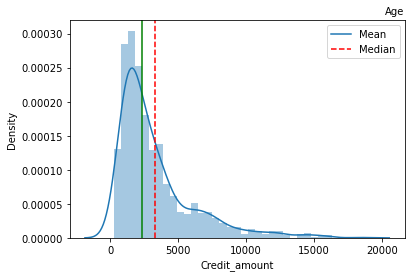

'Median: 2319.5'

'Mean: 3271.258'

In [33]:
variable = data["Credit_amount"]
mean =np.array(variable).mean()
median = np.median(variable)

ax= sns.distplot(variable)
ax.axvline(mean,color='r', linestyle = '--')
ax.axvline(median,color='g', linestyle = '-')

plt.title("Age", fontsize=10, loc="right")
plt.legend({'Mean': mean, 'Median': median})
plt.show()

display("Median: " + str(median))
display("Mean: " + str(mean))

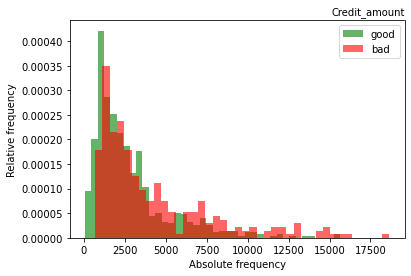

In [34]:
target("Credit_amount")

# Duration 

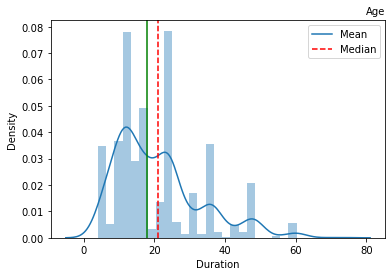

'Median: 18.0'

'Mean: 20.903'

In [35]:
variable = data["Duration"]
mean =np.array(variable).mean()
median = np.median(variable)

ax= sns.distplot(variable)
ax.axvline(mean,color='r', linestyle = '--')
ax.axvline(median,color='g', linestyle = '-')

plt.title("Age", fontsize=10, loc="right")
plt.legend({'Mean': mean, 'Median': median})
plt.show()

display("Median: " + str(median))
display("Mean: " + str(mean))

# Purpose

array([<AxesSubplot:ylabel='Purpose'>], dtype=object)

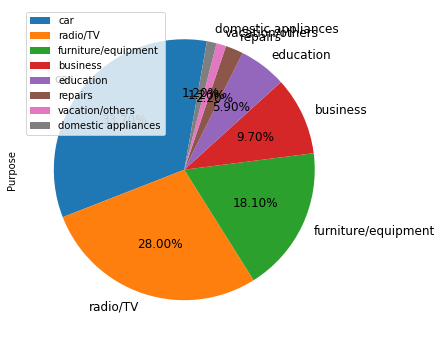

In [36]:
data.Purpose.value_counts().plot(kind = 'pie', subplots=True,
                                 autopct='%1.2f%%',
                                  startangle=80, legend =True,
                                  fontsize=12, figsize=(14,6), textprops={'color':"black"})



# Corelation

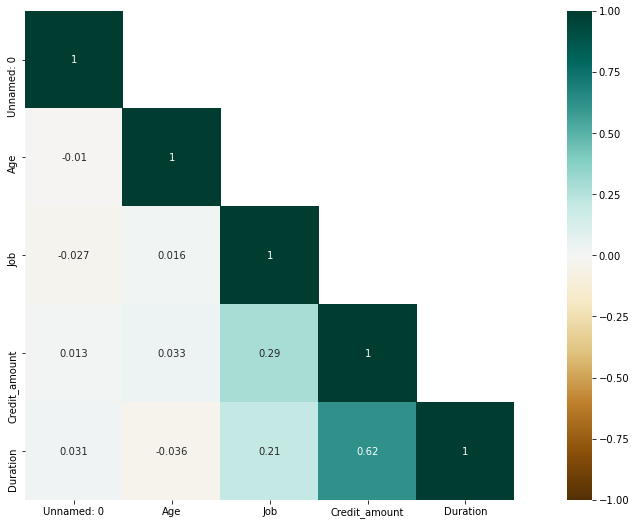

In [37]:
mask = np.triu(data.corr(), 1)

plt.figure(figsize=(19, 9))

sns.heatmap(data.corr(), annot=True, vmax=1, vmin=-1, square=True, cmap='BrBG', mask=mask);

# 2) Data Wragling ( Cleaning, Missing values, Encoding)

In [38]:
# Numerical data
data_ca = data.select_dtypes(exclude=["int64","float64"]).copy()

In [39]:
# Categoric data
data_nu = data.select_dtypes(exclude=["object","category"]).copy()

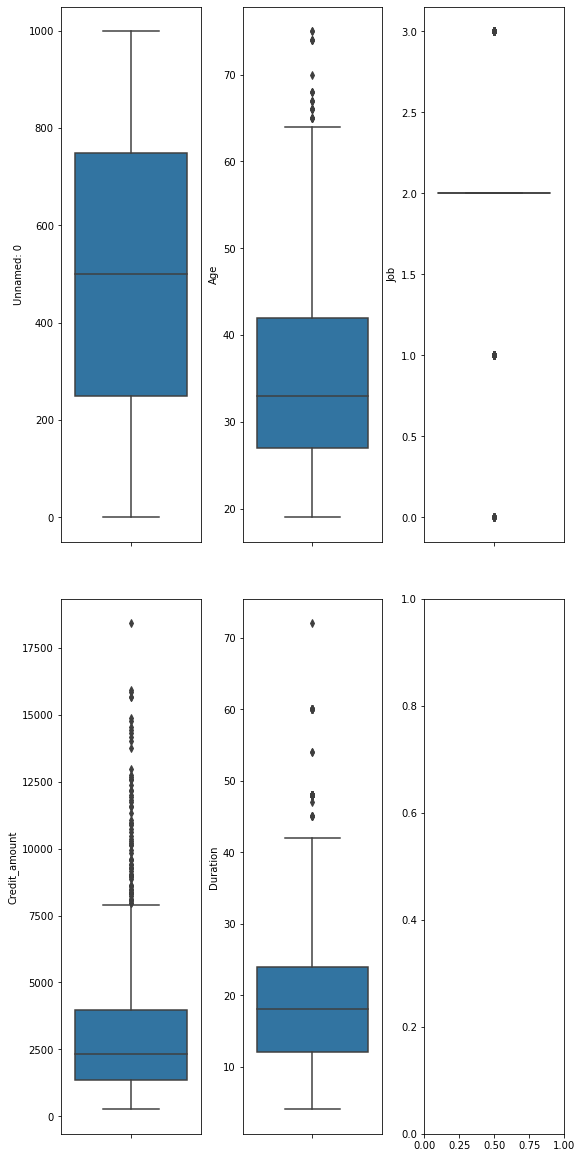

In [40]:
fig , axs = plt.subplots(ncols = 3, nrows=2, figsize=(8,16))
index = 0
axs = axs.flatten()

for k,v in data_nu.items():
    sns.boxplot(y = k , data = data_nu, ax = axs[index], orient = "h")
    index +=1
    plt.tight_layout(pad= 0.4, w_pad = 0.5 , h_pad = 5.0)

# Age

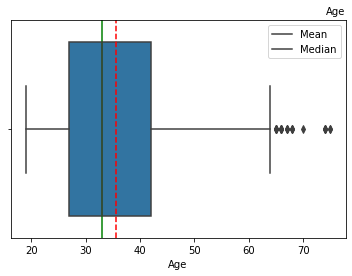

count    1000.000000
mean       35.546000
std        11.375469
min        19.000000
25%        27.000000
50%        33.000000
75%        42.000000
max        75.000000
Name: Age, dtype: float64


In [41]:
variable = data["Age"]

mean =np.array(variable).mean()
median = np.median(variable)

ax= sns.boxplot(variable)
ax.axvline(mean,color='r', linestyle = '--')
ax.axvline(median,color='g', linestyle = '-')

plt.title("Age", fontsize=10, loc="right")
plt.legend({'Mean': mean, 'Median': median})
plt.show()

print(data.Age.describe())

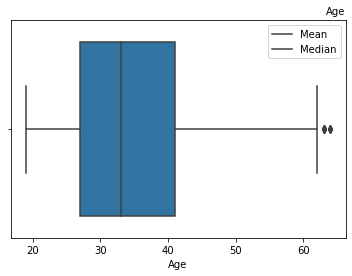

count    977.000000
mean      34.769703
std       10.291110
min       19.000000
25%       27.000000
50%       33.000000
75%       41.000000
max       64.000000
Name: Age, dtype: float64


In [42]:
# finding outliners according to IQR score and DELETING

Q1 = data['Age'].quantile(0.25)
Q3 = data['Age'].quantile(0.75)

IQR = Q3 -Q1

data['Age'] = data.Age[~((data.Age < Q1 - 1.5 * IQR ) |
                                      (data.Age > Q3 + 1.5 *IQR ))]




variable = data["Age"]

mean =np.array(variable).mean()
median = np.median(variable)

ax= sns.boxplot(variable)
ax.axvline(mean,color='r', linestyle = '--')
ax.axvline(median,color='g', linestyle = '-')

plt.title("Age", fontsize=10, loc="right")
plt.legend({'Mean': mean, 'Median': median})
plt.show()

print(data.Age.describe())

In [43]:
 print( "Number of deleted outliners : "+ str(data_nu.Age.describe()[0] - data.Age.describe()[0]))

Number of deleted outliners : 23.0


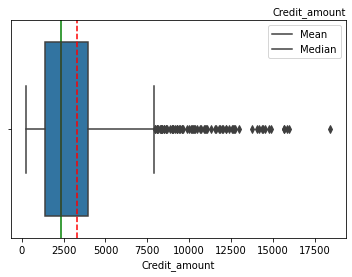

count     1000.000000
mean      3271.258000
std       2822.736876
min        250.000000
25%       1365.500000
50%       2319.500000
75%       3972.250000
max      18424.000000
Name: Credit_amount, dtype: float64


In [44]:
variable = data["Credit_amount"]

mean =np.array(variable).mean()
median = np.median(variable)

ax= sns.boxplot(variable)
ax.axvline(mean,color='r', linestyle = '--')
ax.axvline(median,color='g', linestyle = '-')

plt.title("Credit_amount", fontsize=10, loc="right")
plt.legend({'Mean': mean, 'Median': median})
plt.show()

print(data.Credit_amount.describe())

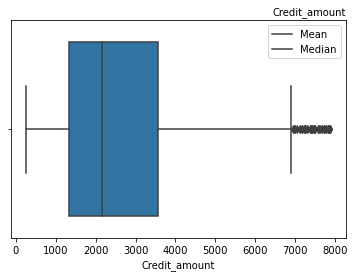

count     928.000000
mean     2676.260776
std      1789.289642
min       250.000000
25%      1328.250000
50%      2145.500000
75%      3569.250000
max      7882.000000
Name: Credit_amount, dtype: float64


In [45]:
# finding outliners according to IQR score and DELETING

Q1 = data['Credit_amount'].quantile(0.25)
Q3 = data['Credit_amount'].quantile(0.75)

IQR = Q3 -Q1

data['Credit_amount'] = data.Credit_amount[~((data.Credit_amount < Q1 - 1.5 * IQR ) |
                                      (data.Credit_amount > Q3 + 1.5 *IQR ))]




variable = data["Credit_amount"]

mean =np.array(variable).mean()
median = np.median(variable)

ax= sns.boxplot(variable)
ax.axvline(mean,color='r', linestyle = '--')
ax.axvline(median,color='g', linestyle = '-')

plt.title("Credit_amount", fontsize=10, loc="right")
plt.legend({'Mean': mean, 'Median': median})
plt.show()

print(data.Credit_amount.describe())

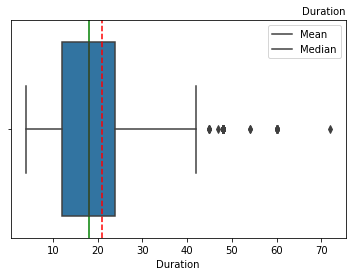

count    1000.000000
mean       20.903000
std        12.058814
min         4.000000
25%        12.000000
50%        18.000000
75%        24.000000
max        72.000000
Name: Duration, dtype: float64


In [46]:
variable = data["Duration"]

mean =np.array(variable).mean()
median = np.median(variable)

ax= sns.boxplot(variable)
ax.axvline(mean,color='r', linestyle = '--')
ax.axvline(median,color='g', linestyle = '-')

plt.title("Duration", fontsize=10, loc="right")
plt.legend({'Mean': mean, 'Median': median})
plt.show()

print(data.Duration.describe())

In [47]:
value = data.Duration.quantile([.990])
p = value.iloc[0]

print("Threshold value value : " + str(p))

data = data[data["Duration"] < p]

Threshold value value : 60.0


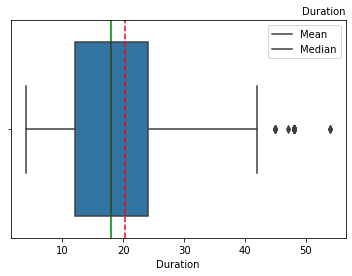

count    986.000000
mean      20.335700
std       11.150556
min        4.000000
25%       12.000000
50%       18.000000
75%       24.000000
max       54.000000
Name: Duration, dtype: float64


In [48]:
variable = data["Duration"]

mean =np.array(variable).mean()
median = np.median(variable)

ax= sns.boxplot(variable)
ax.axvline(mean,color='r', linestyle = '--')
ax.axvline(median,color='g', linestyle = '-')

plt.title("Duration", fontsize=10, loc="right")
plt.legend({'Mean': mean, 'Median': median})
plt.show()

print(data.Duration.describe())

### MISSING VALUES 

In [49]:
for column in data.columns:
    if data[column].isna().sum() != 0:
        missing = data[column].isna().sum()
        portion = (missing / data.shape[0]) * 100
        print(f"'{column}': number of missing values : '{missing}', portion : '{portion:.3f}%'")

'Age': number of missing values : '23', portion : '2.333%'
'Saving_accounts': number of missing values : '179', portion : '18.154%'
'Checking_account': number of missing values : '389', portion : '39.452%'
'Credit_amount': number of missing values : '65', portion : '6.592%'


In [50]:

data["Age"] = data. Age.fillna(data.Age.mean())

print(data.Age.isnull().values.any())

False


In [51]:
data["Saving_accounts"] = data.Saving_accounts.fillna(data.Saving_accounts.value_counts().index[0])

print(data.Saving_accounts.isnull().values.any())

False


In [52]:
data["Checking_account"] = data.Checking_account.fillna(data.Checking_account.value_counts().index[0])

print(data.Checking_account.isnull().values.any())

False


In [53]:

data["Credit_amount"] = data. Credit_amount.fillna(data.Credit_amount.mean())

print(data.Credit_amount.isnull().values.any())

False


# DATA SELECTION

In [54]:
data.drop("Unnamed: 0", axis =1, inplace = True)

data.shape

(986, 10)

In [55]:
data.head()

,Age,Sex,Job,Housing,Saving_accounts,Checking_account,Credit_amount,Duration,Purpose,Risk
0,34.744548,male,2,own,little,little,1169.0,6,radio/TV,good
1,22.000000,female,2,own,little,moderate,5951.0,48,radio/TV,bad
2,49.000000,male,1,own,little,little,2096.0,12,education,good
3,45.000000,male,2,free,little,little,7882.0,42,furniture/equipment,good
4,53.000000,male,2,free,little,little,4870.0,24,car,bad


In [56]:
data['Age'] = data['Age'].astype('int')

In [57]:
data['Credit_amount'] = data['Credit_amount'].astype('int')

In [58]:
data.head()

,Age,Sex,Job,Housing,Saving_accounts,Checking_account,Credit_amount,Duration,Purpose,Risk
0,34,male,2,own,little,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,little,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad


In [59]:
data["Risk"] = data.Risk.map({"good":0, "bad":1})

In [60]:
data.head()

,Age,Sex,Job,Housing,Saving_accounts,Checking_account,Credit_amount,Duration,Purpose,Risk
0,34,male,2,own,little,little,1169,6,radio/TV,0
1,22,female,2,own,little,moderate,5951,48,radio/TV,1
2,49,male,1,own,little,little,2096,12,education,0
3,45,male,2,free,little,little,7882,42,furniture/equipment,0
4,53,male,2,free,little,little,4870,24,car,1


In [61]:
data_nu = data.select_dtypes(exclude=["object","category"]).copy()

Xnumerical = data_nu.drop(["Risk"], axis ="columns")
Ynumerical = data_nu.Risk

In [62]:
pd.DataFrame(
    [scipy.stats.pearsonr(Xnumerical[col],
    Ynumerical) for col in Xnumerical.columns],
    columns= ["Pearson Corr.", "p-value"],
    index = Xnumerical.columns,
).round(4)

,Pearson Corr.,p-value
Age,-0.1024,0.0013
Job,0.0273,0.3920
Credit_amount,0.0341,0.2851
Duration,0.2126,0.0000


In [63]:
Xcategorical = data.select_dtypes(exclude = ['int64', 'float64']).copy()

In [64]:
Ycategorical = data.Risk

In [65]:
for col in Xcategorical.columns:
    table = pd.crosstab(Xcategorical[col], Ycategorical)
    print()
    display(table)
    _, pval, _, expected_table = scipy.stats.chi2_contingency(table)
    print(f"p-value: {pval:.25f}")

Risk,0,1
Age,,
19,1,1
20,9,5
21,7,5
22,16,11
23,28,20
24,25,17
25,22,19
26,36,14
27,36,12


p-value: 0.1890520732129706282798054



Risk,0,1
Sex,,
female,200,107
male,493,186


p-value: 0.0215463666592738585514599



Risk,0,1
Housing,,
free,61,42
own,523,182
rent,109,69


p-value: 0.0001147358995036771417940



Risk,0,1
Saving_accounts,,
little,531,245
moderate,68,31
quite rich,52,11
rich,42,6


p-value: 0.0052254318233701472357078



Risk,0,1
Checking_account,,
little,482,179
moderate,162,100
rich,49,14


p-value: 0.0016173409984241650556858



Risk,0,1
Credit_amount,,
250,1,0
276,1,0
338,1,0
339,1,0
343,1,0
...,...,...
7814,1,0
7824,1,0
7855,0,1


p-value: 0.5026690371164097559386619



Risk,0,1
Purpose,,
business,63,32
car,228,104
domestic appliances,8,4
education,36,22
furniture/equipment,123,58
radio/TV,214,61
repairs,14,8
vacation/others,7,4


p-value: 0.1101752039037598163151443


In [66]:
data.head()

,Age,Sex,Job,Housing,Saving_accounts,Checking_account,Credit_amount,Duration,Purpose,Risk
0,34,male,2,own,little,little,1169,6,radio/TV,0
1,22,female,2,own,little,moderate,5951,48,radio/TV,1
2,49,male,1,own,little,little,2096,12,education,0
3,45,male,2,free,little,little,7882,42,furniture/equipment,0
4,53,male,2,free,little,little,4870,24,car,1


# Encoding

In [67]:
data = pd.get_dummies(data, columns=["Sex","Housing","Saving_accounts","Checking_account"])

In [68]:
bin_enc_purp = BinaryEncoder()
data_bin = bin_enc_purp.fit_transform(data.Purpose)

In [69]:
df = pd.concat([data,data_bin],axis=1)
df.drop(["Purpose"], axis=1, inplace=True)
df.columns = [x.lower() for x in df.columns]
df.head()

,age,job,credit_amount,duration,risk,sex_female,sex_male,housing_free,housing_own,housing_rent,...,saving_accounts_moderate,saving_accounts_quite rich,saving_accounts_rich,checking_account_little,checking_account_moderate,checking_account_rich,purpose_0,purpose_1,purpose_2,purpose_3
0,34,2,1169,6,0,0,1,0,1,0,...,0,0,0,1,0,0,0,0,0,1
1,22,2,5951,48,1,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,1
2,49,1,2096,12,0,0,1,0,1,0,...,0,0,0,1,0,0,0,0,1,0
3,45,2,7882,42,0,0,1,1,0,0,...,0,0,0,1,0,0,0,0,1,1
4,53,2,4870,24,1,0,1,1,0,0,...,0,0,0,1,0,0,0,1,0,0


In [70]:
dfi.export(df.head(), 'veriseti2_son_head.png')

# ML : Models

 - Logistic Regression
 - KNN
 - SVM
 - Decision Tree
 - Random Forest
 - Neural Network

In [125]:
def auc_roc_plot(y_test, y_preds):
    fpr, tpr, thresholds = roc_curve(y_test,y_preds)
    
    roc_auc = auc(fpr, tpr)   
    
    print(roc_auc)    
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()
    return roc_auc;

# LOGISTIC REGRESSION

In [128]:
# Making a copy of the dataset
df_lr = df.copy()



# Dividing the dataset in train (80%) and test (20%)
train_set_lr, test_set_lr = train_test_split(df_lr, test_size = 0.2, random_state = seed)

X_train_lr = train_set_lr.drop(['risk'], axis = 1)
y_train_lr = train_set_lr['risk']

X_test_lr = test_set_lr.drop(['risk'], axis = 1)
y_test_lr = test_set_lr['risk']


# Normalizing the train and test data

scaler_lr = MinMaxScaler()
features_names = X_train_lr.columns

X_train_lr = scaler_lr.fit_transform(X_train_lr)
X_train_lr = pd.DataFrame(X_train_lr, columns = features_names)

X_test_lr = scaler_lr.transform(X_test_lr)
X_test_lr = pd.DataFrame(X_test_lr, columns = features_names)

%time
lr = LogisticRegression(max_iter = 1000, solver = 'lbfgs', random_state = seed, class_weight = 'balanced' )
parameters = {'C':[0.001, 0.01, 0.1, 1, 10, 100]} #Inverse of regularization strength
clf_lr = GridSearchCV(lr, parameters, cv=5).fit(X_train_lr, y_train_lr)
%time


Wall time: 0 ns
Wall time: 0 ns


In [129]:
clf_lr

GridSearchCV(cv=5,
             estimator=LogisticRegression(class_weight='balanced',
                                          max_iter=1000, random_state=42),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100]})

In [130]:
clf_lr.best_estimator_

LogisticRegression(C=100, class_weight='balanced', max_iter=1000,
                   random_state=42)

In [131]:
y_preds_lr = clf_lr.predict_proba(X_test_lr)[:,1]

0.655026455026455


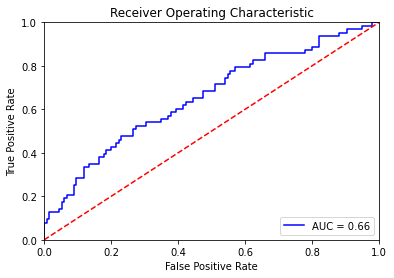

In [132]:
aucroclr = auc_roc_plot(y_test_lr, y_preds_lr)

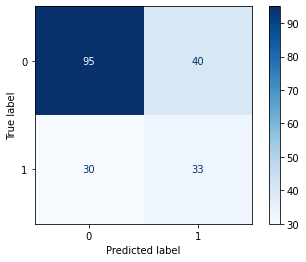

In [133]:
plot_confusion_matrix(clf_lr, X_test_lr, y_test_lr, values_format=".4g", cmap="Blues");

tn, fp, fn, tp = confusion_matrix(y_test_lr == 1, y_preds_lr > 0.5).ravel()

tn_lr = tn
fp_lr = fp
fn_lr = fn
tp_lr = tp

# KNN

In [134]:
df_knn = df.copy()



train_set_knn, test_set_knn = train_test_split(df_knn, test_size = 0.2, random_state = seed)

X_train_knn = train_set_knn.drop(['risk'], axis = 1)
y_train_knn = train_set_knn['risk']

X_test_knn = test_set_knn.drop(['risk'], axis = 1)
y_test_knn = test_set_knn['risk']



scaler_knn = MinMaxScaler()
features_names = X_train_knn.columns

X_train_knn = scaler_knn.fit_transform(X_train_knn)
X_train_knn = pd.DataFrame(X_train_knn, columns = features_names)

X_test_knn = scaler_knn.transform(X_test_knn)
X_test_knn = pd.DataFrame(X_test_knn, columns = features_names)

%time
max = 0
best_k = 0
for k in range(1, 200, 5):
    k = k + 1
    knn = KNeighborsClassifier(n_neighbors = k).fit(X_train_knn, y_train_knn)
    acc = knn.score(X_test_knn, y_test_knn)
    if(acc > max):
        max = acc
        best_k = k
    print('Accuracy for k = ', k , 'is : ' , acc)

Wall time: 0 ns
Accuracy for k =  2 is :  0.702020202020202
Accuracy for k =  7 is :  0.6363636363636364
Accuracy for k =  12 is :  0.6919191919191919
Accuracy for k =  17 is :  0.6616161616161617
Accuracy for k =  22 is :  0.6767676767676768
Accuracy for k =  27 is :  0.6818181818181818
Accuracy for k =  32 is :  0.6818181818181818
Accuracy for k =  37 is :  0.6767676767676768
Accuracy for k =  42 is :  0.6767676767676768
Accuracy for k =  47 is :  0.6818181818181818
Accuracy for k =  52 is :  0.6868686868686869
Accuracy for k =  57 is :  0.6818181818181818
Accuracy for k =  62 is :  0.6818181818181818
Accuracy for k =  67 is :  0.6818181818181818
Accuracy for k =  72 is :  0.6818181818181818
Accuracy for k =  77 is :  0.6868686868686869
Accuracy for k =  82 is :  0.6818181818181818
Accuracy for k =  87 is :  0.6868686868686869
Accuracy for k =  92 is :  0.6818181818181818
Accuracy for k =  97 is :  0.6818181818181818
Accuracy for k =  102 is :  0.6818181818181818
Accuracy for k =  10

In [135]:
%time
knn = KNeighborsClassifier(n_neighbors = best_k, weights='uniform').fit(X_train_knn, y_train_knn)

y_preds_knn = knn.predict(X_test_knn)

Wall time: 0 ns


0.5613756613756614


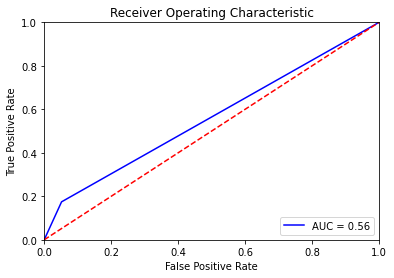

In [136]:
aucrocknn = auc_roc_plot(y_test_knn, y_preds_knn)

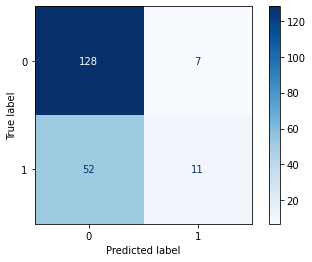

In [137]:
plot_confusion_matrix(knn, X_test_knn, y_test_knn, values_format=".4g", cmap="Blues");

tn, fp, fn, tp = confusion_matrix(y_test_knn == 1, y_preds_knn > 0.5).ravel()

tn_knn = tn
fp_knn = fp
fn_knn = fn
tp_knn = tp

# support vector machine

In [138]:
df_svm = df.copy()

train_set_svc, test_set_svc = train_test_split(df_svm, test_size = 0.2, random_state = seed)

X_train_svc = train_set_svc.drop(['risk'], axis = 1)
y_train_svc = train_set_svc['risk']
X_test_svc = test_set_svc.drop(['risk'], axis = 1)
y_test_svc = test_set_svc['risk']

scaler_svc = MinMaxScaler()
features_names = X_train_svc.columns

X_train_svc = scaler_svc.fit_transform(X_train_svc)
X_train_svc = pd.DataFrame(X_train_svc, columns = features_names)

X_test_svc = scaler_svc.transform(X_test_svc)
X_test_svc = pd.DataFrame(X_test_svc, columns = features_names)

%time
svc = SVC(random_state=seed, class_weight='balanced',probability=True, verbose=True)

parameters = {'C':[0.1, 1, 10]}
clf_svc = GridSearchCV(svc, parameters, cv = 5).fit(X_train_svc, y_train_svc)

Wall time: 0 ns
[LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM]

In [139]:
clf_svc.best_estimator_

SVC(C=10, class_weight='balanced', probability=True, random_state=42,
    verbose=True)

In [140]:
y_preds_svc = clf_svc.predict_proba(X_test_svc)[:,1]

0.533098177542622


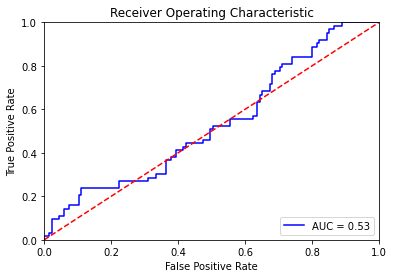

In [141]:
aucrocsvc = auc_roc_plot(y_test_svc, y_preds_svc)

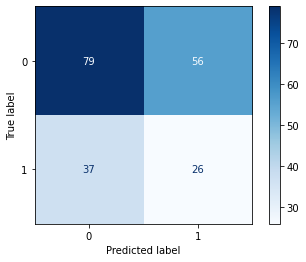

In [142]:
# Confusion Matrix display
plot_confusion_matrix(clf_svc, X_test_svc, y_test_svc, values_format=".4g", cmap="Blues");
                   
tn, fp, fn, tp = confusion_matrix(y_test_svc == 1, y_preds_svc > 0.5).ravel()

tn_svc = tn
fp_svc = fp
fn_svc = fn
tp_svc = tp

# DESICION TREE

In [143]:
df_trees = df.copy()

train_set_dt, test_set_dt = train_test_split(df_trees, test_size = 0.2, random_state = seed)

X_train_dt = train_set_dt.drop(['risk'], axis = 1)
y_train_dt = train_set_dt['risk']

X_test_dt = test_set_dt.drop(['risk'], axis = 1)
y_test_dt = test_set_dt['risk']

%time
clf_tree = tree.DecisionTreeClassifier(random_state = seed, max_depth = 10).fit(X_train_dt, y_train_dt)

important_features = pd.DataFrame(data = clf_tree.feature_importances_, index = X_train_dt.columns, columns = ["value"])
important_features.sort_values(by = "value", ascending = False)

Wall time: 0 ns


,value
credit_amount,0.269307
age,0.207052
duration,0.153108
job,0.048339
checking_account_little,0.047602
housing_own,0.034726
purpose_1,0.033926
sex_female,0.032591
saving_accounts_little,0.032524
purpose_2,0.026417


In [144]:
y_preds_dt = clf_tree.predict_proba(X_test_dt)[:,1]

0.4663727219282775


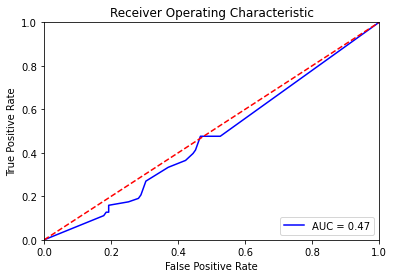

In [145]:
aucrocdt = auc_roc_plot(y_test_dt, y_preds_dt)

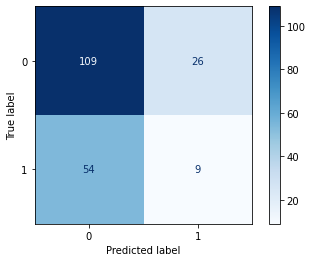

In [146]:
# Confusion Matrix display
plot_confusion_matrix(clf_tree, X_test_dt, y_test_dt, values_format=".4g", cmap="Blues");
                   
tn, fp, fn, tp = confusion_matrix(y_test_dt == 1, y_preds_dt > 0.5).ravel()

tn_dt = tn
fp_dt = fp
fn_dt = fn
tp_dt= tp

# Random Forest

In [148]:
df_rf = df.copy() 


train_set_rf, test_set_rf = train_test_split(df_rf, test_size = 0.2, random_state = seed)
X_train_rf = train_set_rf.drop(['risk'], axis = 1)
y_train_rf = train_set_rf['risk']
X_test_rf = test_set_rf.drop(['risk'], axis = 1)
y_test_rf = test_set_rf['risk']

%time
rf = RandomForestClassifier(random_state = seed, class_weight = None).fit(X_train_rf, y_train_rf)
parameters = {'n_estimators':[10, 100, 300, 1000]} # The number of trees in the forest.
clf_rf = GridSearchCV(rf, parameters, cv = 5).fit(X_train_rf, y_train_rf)

Wall time: 0 ns


In [149]:
clf_rf.best_estimator_

RandomForestClassifier(n_estimators=1000, random_state=42)

In [150]:
y_preds_rf = clf_rf.predict_proba(X_test_rf)[:,1]

0.5430335097001764


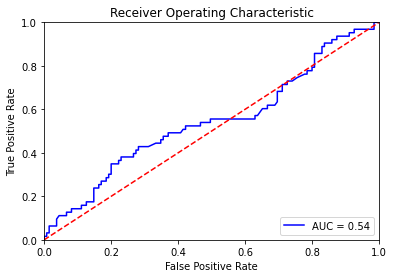

In [151]:
aucrocrf = auc_roc_plot(y_test_rf, y_preds_rf)

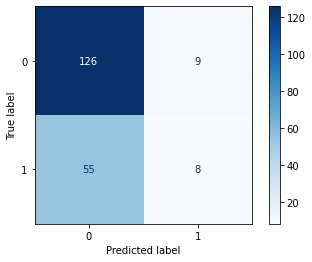

In [152]:

plot_confusion_matrix(clf_rf, X_test_rf, y_test_rf, values_format=".4g", cmap="Blues")

tn, fp, fn, tp = confusion_matrix(y_test_rf == 1, y_preds_rf > 0.5).ravel()

tn_rf = tn
fp_rf = fp
fn_rf = fn
tp_rf = tp

# Neural Neworks (NN)

In [153]:
df_nn = df.copy()

train_set_nn, test_set_nn = train_test_split(df_nn, test_size = 0.2, random_state = seed)

X_train_nn = train_set_nn.drop(['risk'], axis = 1)
y_train_nn = train_set_nn['risk']

X_test_nn = test_set_nn.drop(['risk'], axis = 1)
y_test_nn = test_set_nn['risk']

scaler_nn = MinMaxScaler()
features_names = X_train_nn.columns

X_train_nn = scaler_nn.fit_transform(X_train_nn)
X_train_nn = pd.DataFrame(X_train_nn, columns = features_names)

X_test_nn = scaler_nn.transform(X_test_nn)
X_test_nn = pd.DataFrame(X_test_nn, columns = features_names)

%time
mlp_nn = MLPClassifier(solver = 'adam', random_state = seed, max_iter = 1000 )
#‘adam’ refers to a stochastic gradient-based optimizer proposed by Kingma
parameters = {'hidden_layer_sizes': [(20,), (20,10), (20, 10, 2)],
              'learning_rate_init':[0.0001, 0.001, 0.01, 0.1]}

clf_nn = GridSearchCV(mlp_nn, parameters, cv = 5).fit(X_train_nn, y_train_nn)


Wall time: 0 ns


In [154]:
X_test_nn.head()

,age,job,credit_amount,duration,sex_female,sex_male,housing_free,housing_own,housing_rent,saving_accounts_little,saving_accounts_moderate,saving_accounts_quite rich,saving_accounts_rich,checking_account_little,checking_account_moderate,checking_account_rich,purpose_0,purpose_1,purpose_2,purpose_3
0,0.177778,0.666667,0.445755,0.34,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
1,0.355556,0.666667,0.410901,0.16,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.066667,0.666667,0.292584,0.40,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0
3,0.222222,0.666667,0.311714,0.32,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,0.288889,0.666667,0.571410,0.04,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0


In [155]:
clf_nn.best_estimator_

MLPClassifier(hidden_layer_sizes=(20, 10, 2), learning_rate_init=0.0001,
              max_iter=1000, random_state=42)

In [156]:
y_preds_nn = clf_nn.predict_proba(X_test_nn)[:,1]

In [157]:
y_preds_nn

array([0.44624492, 0.44624492, 0.44624492, 0.44624492, 0.44624492,
       0.44624492, 0.45699304, 0.44624492, 0.44624492, 0.44624492,
       0.44624492, 0.44624492, 0.44624492, 0.44624492, 0.44624492,
       0.47859535, 0.44624492, 0.44624492, 0.44624492, 0.44624492,
       0.44624492, 0.44990031, 0.44624492, 0.44624492, 0.44624492,
       0.44624492, 0.44624492, 0.44624492, 0.44624492, 0.44624492,
       0.44624492, 0.44624492, 0.44624492, 0.44624492, 0.44624492,
       0.44624492, 0.44624492, 0.46493873, 0.44624492, 0.4490848 ,
       0.44624492, 0.44624492, 0.51744633, 0.46333599, 0.44624492,
       0.44624492, 0.44624492, 0.44624492, 0.44624492, 0.44624492,
       0.44624492, 0.44932881, 0.44624492, 0.44624492, 0.44624492,
       0.44624492, 0.44624492, 0.44624492, 0.44624492, 0.44624492,
       0.44624492, 0.44624492, 0.44624492, 0.44624492, 0.44624492,
       0.44624492, 0.44624492, 0.44624492, 0.44624492, 0.44624492,
       0.44624492, 0.44624492, 0.44624492, 0.44624492, 0.44624

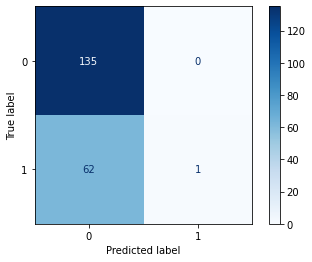

In [158]:

plot_confusion_matrix(clf_nn, X_test_nn, y_test_nn, values_format=".4g", cmap="Blues")

tn, fp, fn, tp = confusion_matrix(y_test_nn == 1, y_preds_nn > 0.5).ravel()

tn_nn = tn
fp_nn = fp
fn_nn = fn
tp_nn = tp

0.5073486184597296


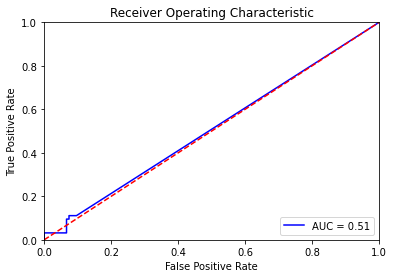

In [159]:
aucrocnn = auc_roc_plot(y_test_nn, y_preds_nn)

In [164]:
test_size = X_test_nn.shape[0]

In [165]:
# Creating performance table
results_1 = {'Classifier': ['AUC ROC (%)','TN (%)','FP (%)','FN (%)','TP (%)'],
             'Logistic Regression (LR)': [aucroclr*100, (tn_lr/test_size*100).round(2), (fp_lr/test_size*100).round(2), (fn_lr/test_size*100).round(2), (tp_lr/test_size*100).round(2)],
             'K Nearest Neighbour (KNN)': [aucrocknn*100, (tn_knn/test_size*100).round(2),(fp_knn/test_size*100).round(2), (fn_knn/test_size*100).round(2),(tp_nn/test_size*100).round(2)],
             'Support Vector Machine (SVC)': [aucrocsvc*100, (tn_svc/test_size*100).round(2),(fp_svc/test_size*100).round(2), (fn_svc/test_size*100).round(2),(tp_svc/test_size*100).round(2)],
             'Decision Trees (DT)': [aucrocdt*100, (tn_dt/test_size*100).round(2), (fp_dt/test_size*100).round(2), (fn_dt/test_size*100).round(2),(tp_dt/test_size*100).round(2)],
             'Random Forest (RF)': [aucrocrf*100, (tn_rf/test_size*100).round(2), (fp_rf/test_size*100).round(2), (fn_rf/test_size*100).round(2),(tp_rf/test_size*100).round(2)],
             'Neural Networks (NN)': [aucrocnn*100, (tn_nn/test_size*100).round(2), (fp_nn/test_size*100).round(2),(fn_nn/test_size*100).round(2),(tp_nn/test_size*100).round(2)]}

df1 = pd.DataFrame(results_1, columns = ['Classifier', 'Logistic Regression (LR)', 'K Nearest Neighbour (KNN)', 'Support Vector Machine (SVC)', 'Decision Trees (DT)', 'Random Forest (RF)', 'Neural Networks (NN)'])

df1.set_index("Classifier", inplace=True)

results = df1.T
results

Classifier,AUC ROC (%),TN (%),FP (%),FN (%),TP (%)
Logistic Regression (LR),65.502646,47.98,20.20,15.15,16.67
K Nearest Neighbour (KNN),56.137566,64.65,3.54,26.26,0.51
Support Vector Machine (SVC),53.309818,67.17,1.01,31.31,0.51
Decision Trees (DT),46.637272,55.05,13.13,27.27,4.55
Random Forest (RF),54.303351,63.64,4.55,27.78,4.04
Neural Networks (NN),50.734862,68.18,0.00,31.31,0.51


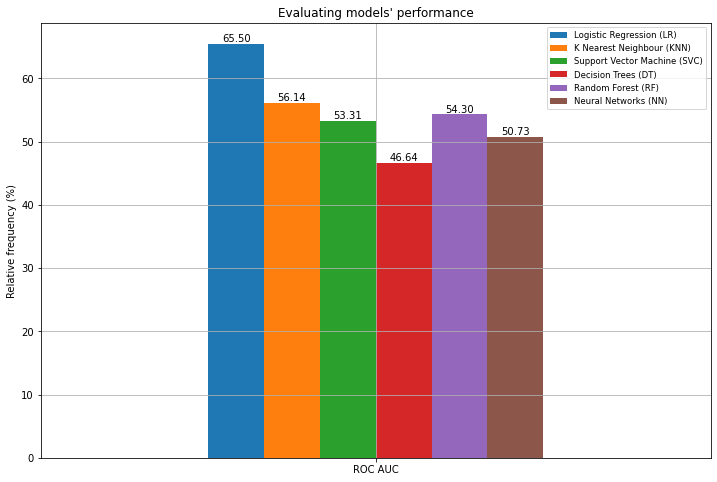

In [166]:

results_2 = {'Classifier': ['ROC AUC'], 'Logistic Regression (LR)': [aucroclr*100], 
             'K Nearest Neighbour (KNN)': [aucrocknn*100], 
             'Support Vector Machine (SVC)': [aucrocsvc*100], 
             'Decision Trees (DT)': [aucrocdt*100], 
             'Random Forest (RF)': [aucrocrf*100], 
             'Neural Networks (NN)': [aucrocnn*100]}
df2 = pd.DataFrame(results_2, columns = ['Classifier', 'Logistic Regression (LR)',
                                         'K Nearest Neighbour (KNN)', 'Support Vector Machine (SVC)',
                                         'Decision Trees (DT)', 'Random Forest (RF)', 'Neural Networks (NN)'])
df2.set_index("Classifier", inplace=True)
results_2 = df2


ax = results_2.plot(kind="bar", title=("Evaluating models' performance"), 
                    figsize=(12,8) ,fontsize=10, grid=True)
for p in ax.patches:
    ax.annotate("%2.2f" % p.get_height(), (p.get_x() + p.get_width() /
                                          2., p.get_height()), ha='center', va='center', xytext=(0, 5), 
                                          textcoords='offset points')

plt.legend(fontsize=8.5, loc="upper right")
plt.xlabel('')
plt.xticks(rotation='horizontal')
plt.ylabel('Relative frequency (%)')
plt.show()